In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("bank_1.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
selected_col=['default','housing','loan','deposit']
selected_col

['default', 'housing', 'loan', 'deposit']

In [7]:
for col in selected_col:
    data[col]=data[col].map({"yes":1,"no":0})

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [9]:
data = pd.get_dummies(data,columns=["job","marital","education","contact","month","poutcome"],drop_first=True,dtype="int64")
data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,0,733,0,0,16,83,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,0,29,0,0,19,156,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,0,0,1,8,9,2,172,5,...,0,0,0,1,0,0,0,0,0,0


In [10]:
x=data.drop(["deposit"],axis=1)
y=data["deposit"]
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,20,257,1,-1,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,0,733,0,0,16,83,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
11159,32,0,29,0,0,19,156,2,-1,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,0,0,1,8,9,2,172,5,...,0,0,0,1,0,0,0,0,0,0


In [11]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123,shuffle=True)
print(f"x training {x_train.shape}")
print(f"y training {y_train.shape}")
print(f"x_testing {x_test.shape}")
print(f"y_testing  {y_test.shape}")

x training (8929, 42)
y training (8929,)
x_testing (2233, 42)
y_testing  (2233,)


In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
bank_rf=RandomForestClassifier()
bank_rf

RandomForestClassifier()

In [15]:
bank_rf.fit(x_train,y_train)
y_predict=bank_rf.predict(x_test)

In [16]:
y_predict

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1146
           1       0.83      0.88      0.85      1087

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [51]:
select_model=[LogisticRegression(),
              DecisionTreeClassifier(max_depth=None,min_samples_leaf=2,min_samples_split=5),
              RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=10,n_estimators=350)]


In [52]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [53]:
acc=[]
for model in select_model:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"accuracy {accuracy_score(y_pred,y_test)} of model is {model}")
    acc.append(accuracy_score(y_pred,y_test))
    print(acc)

accuracy 0.7890729959695477 of model is LogisticRegression()
[0.7890729959695477]
accuracy 0.7801164352888491 of model is DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5)
[0.7890729959695477, 0.7801164352888491]
accuracy 0.8549037169726825 of model is RandomForestClassifier(min_samples_split=10, n_estimators=350)
[0.7890729959695477, 0.7801164352888491, 0.8549037169726825]


In [54]:
result=[acc]
result
pd.DataFrame(data=result,columns=(["LogisticRegression","DecisionTree","RandomForest"]),index=["accuracy"])

,LogisticRegression,DecisionTree,RandomForest
accuracy,0.789073,0.780116,0.854904


In [55]:
rf=RandomForestClassifier()
rf

RandomForestClassifier()

In [56]:
param_grid = {
    'n_estimators' : [100,200,300,350],
    'max_depth' : [None,10,20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf'  : [1,2,4],
}

In [57]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1)
#njobs-1 for faster computation / parallization?

#fit the model with differen hyer parameters combinations
grid_search.fit(x_train,y_train)

#Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [58]:
best_params

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 350}

In [48]:
# #RAMDOM HYPER PARAMETERS
#DecisionTreeClassifier(max_depth=None,min_samples_leaf=2,min_samples_split=5),
#RandomForestClassifier(max_depth=None,min_samples_leaf=2,min_samples_split=5,n_estimators=100)]

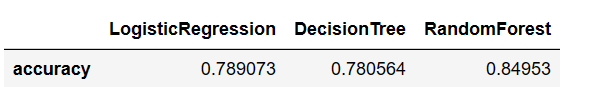

In [49]:
#GRID SEARCH HYPER PARAMETERS
#DecisionTreeClassifier(max_depth=None,min_samples_leaf=2,min_samples_split=5),
#RandomForestClassifier(max_depth=None,min_samples_leaf=1,min_samples_split=10,n_estimators=350)]

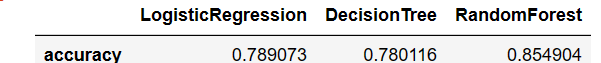